In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
labels = ['Abnormal(Ulcer)','Normal(Healthy skin)']

In [4]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size, image_size))
        except:
            break
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 110/110 [00:00<00:00, 311.97it/s]


In [5]:
X_train.shape

(3190, 224, 224, 3)

In [6]:
y_train.shape

(3190,)

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=1010)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=1010)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
import keras
import keras.utils
from keras import utils as np_utils
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input, Dense, concatenate
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras import Model
from keras.layers.core import Dense, Activation
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Reshape, Concatenate, Dropout , MaxPooling1D, Flatten
from keras.layers import Dense, Input
from tensorflow.keras.layers import Input, Conv2D, \
     MaxPool2D, Flatten, Dense

In [17]:
input = Input(shape=(224, 224, 3))

Build VGG16 Model

In [18]:
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)

Build VGG19 Model

In [19]:
y = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
y = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(y)
y = MaxPool2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(y)
y = MaxPool2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(y)
y = MaxPool2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = MaxPool2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(y)
y = MaxPool2D(pool_size=2, strides=2, padding='same')(y)
y = Flatten()(y)
y = Dense(units=4096, activation='relu')(y)
y = Dense(units=4096, activation='relu')(y)

In [20]:
merged = Concatenate()([x, y])
output = Dense(2, activation='softmax')(merged)

model = Model(inputs=[input], outputs=[output])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_55 (Conv2D)             (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 224, 224, 64  36928       ['conv2d_55[0][0]']              
                                )                                                             

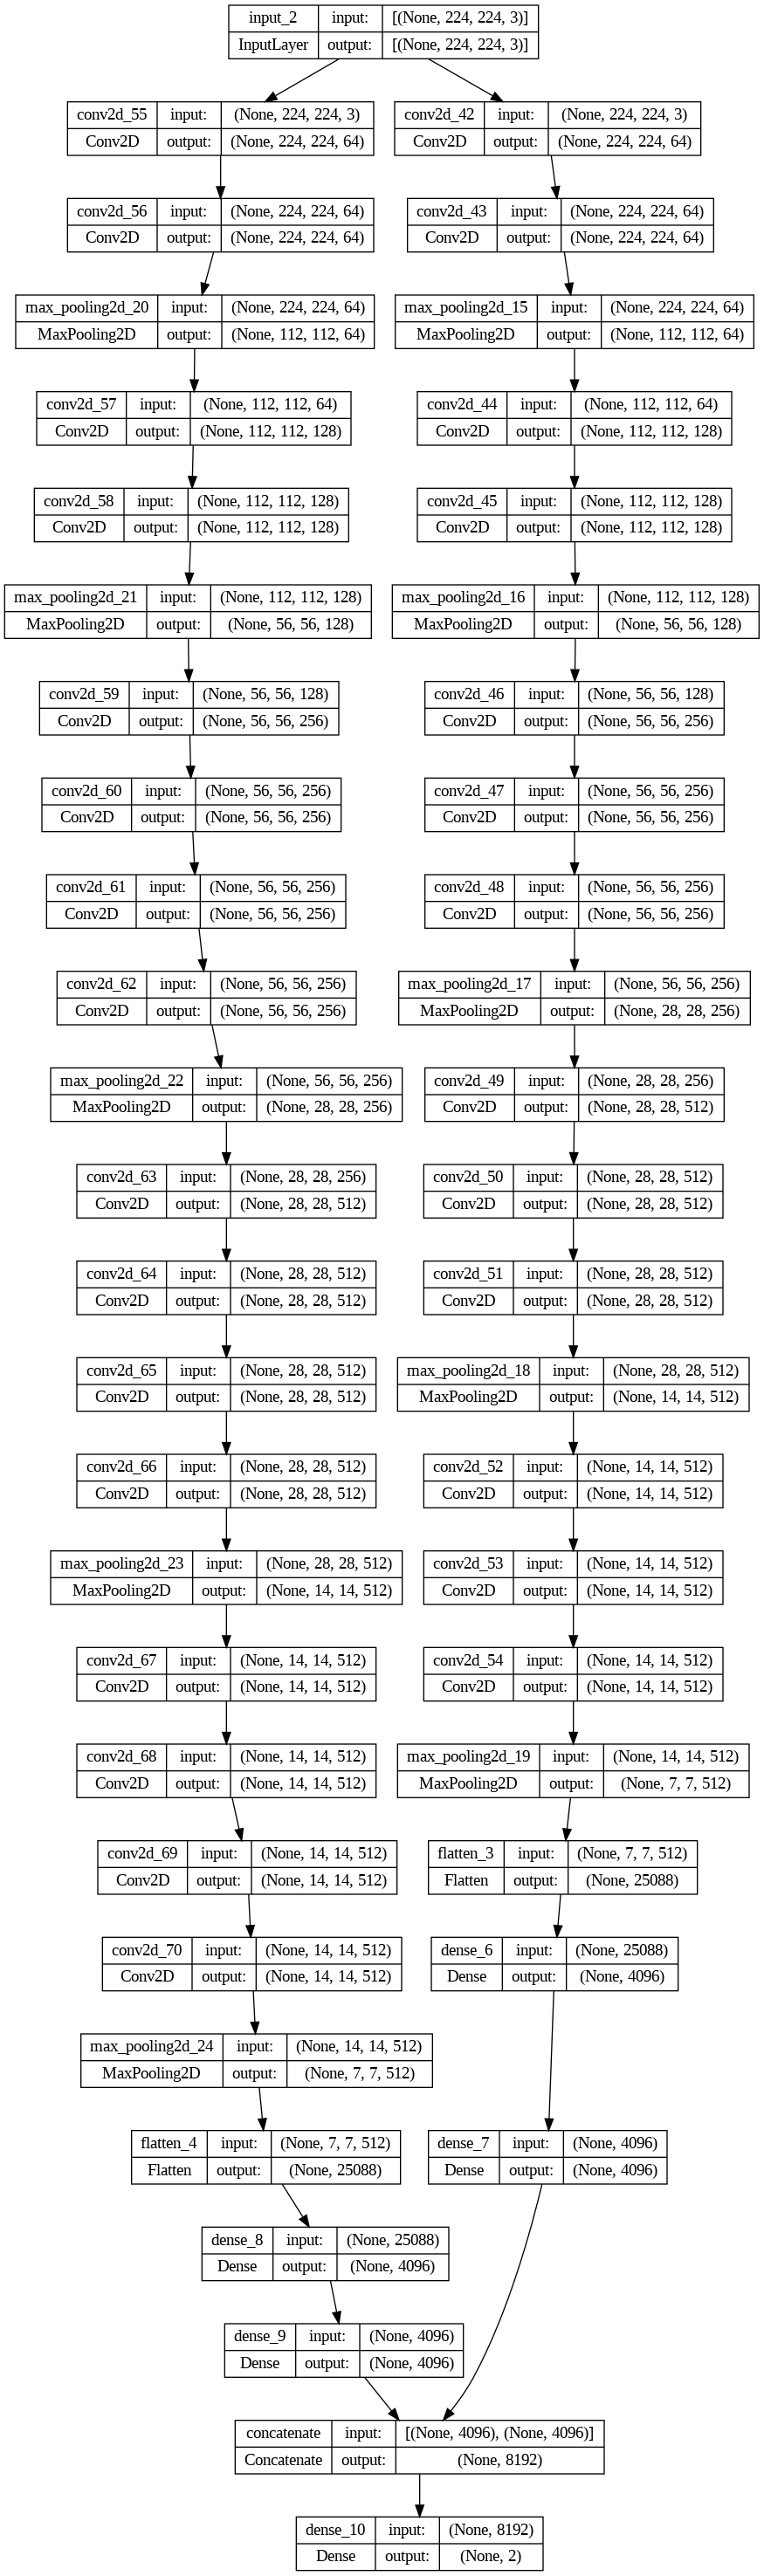

In [21]:
model.summary()

# plot model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='VGG16+VGG19.png')

In [22]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')

In [23]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("VGG16Net+VGG19Net.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [24]:
history = model.fit(X_train,y_train,validation_split=0.05, epochs =30, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/30
86/86 [==============================] - ETA: 0s - loss: 413.2046 - accuracy: 0.5545
Epoch 1: val_accuracy improved from -inf to 0.59722, saving model to VGG16Net+VGG19Net.h5
86/86 [==============================] - 111s 1s/step - loss: 413.2046 - accuracy: 0.5545 - val_loss: 0.6746 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.5974
Epoch 2: val_accuracy did not improve from 0.59722
86/86 [==============================] - 73s 854ms/step - loss: 0.6753 - accuracy: 0.5974 - val_loss: 0.6731 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.5974
Epoch 3: val_accuracy did not improve from 0.59722

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
86/86 [==============================] - 73s 850ms/step - loss: 0.6802 - accuracy: 0.5974 - val_loss: 0.6742 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 4/30
8

<ipython-input-25-93565f2ec6c2>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
<ipython-input-25-93565f2ec6c2>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


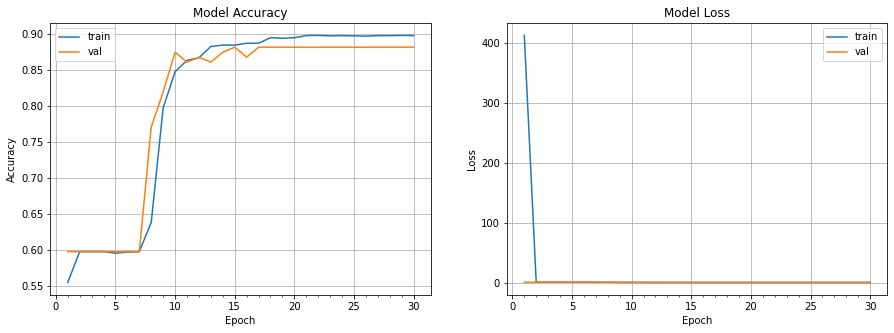

In [25]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid()
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid()
    plt.show()
    
plot_model_history(history)

In [26]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

10/10 [==============================] - 5s 554ms/step


In [27]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       195
           1       0.87      0.90      0.88       124

    accuracy                           0.91       319
   macro avg       0.90      0.91      0.90       319
weighted avg       0.91      0.91      0.91       319



In [28]:
cm = confusion_matrix(y_test_new, pred)

Confusion matrix, without normalization


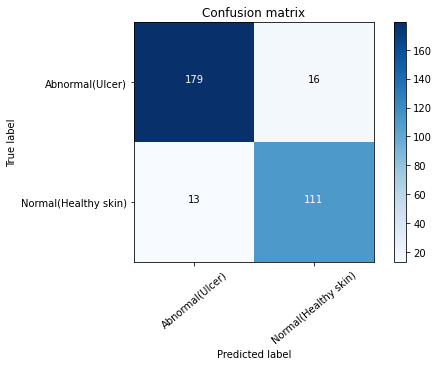

In [29]:
import itertools
from itertools import product
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,labels)
plt.savefig('GoogleNetCM',dpi=400)

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, roc_curve, auc,roc_auc_score

print('Accuracy: %.3f' % accuracy_score(y_test_new, pred), 'Precision: %.3f' % precision_score(y_test_new, pred),' Recall: %.3f' % recall_score(y_test_new, pred), 
      'F1 Score: %.3f' % f1_score(y_test_new, pred), 'AUC Score: %.3f' % roc_auc_score(y_test_new, pred))

Accuracy: 0.909 Precision: 0.874  Recall: 0.895 F1 Score: 0.884 AUC Score: 0.907


In [31]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [32]:
specificity=TN/float(TN+FP)
print('Specificity: %.3f' % specificity)

Specificity: 0.918


In [33]:
recall=TP/float(TP+FN)
print(' Recall: %.3f' % recall)
precision=TP/float(TP+FP)
print(' Precision: %.3f' % precision)

 Recall: 0.895
 Precision: 0.874


In [34]:
f1=(2*precision*recall)/(recall+precision)
print('F1 Score: %.3f' % f1)

F1 Score: 0.884


In [35]:
print( 'AUC Score: %.3f' % roc_auc_score(y_test_new, pred))

AUC Score: 0.907


In [36]:
from sklearn.metrics import mean_squared_error
print( 'Error Rate: %.3f' % mean_squared_error(y_test_new, pred))

Error Rate: 0.091


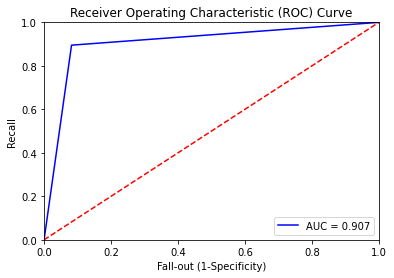

In [37]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test_new, pred)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [38]:
acc = accuracy_score(y_test_new, pred)*100
auc=roc_auc_score(y_test_new, pred)*100
tn, fp, fn, tp = cm.ravel()
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
specificity = tn/(tn+fp)*100
print('Accuracy: {0:0.2f}%'.format(acc))
print('Precision: {0:0.2f}%'.format(precision))
print('Recall or Sensitivity: {0:0.2f}%'.format(recall))
print('Specificity: {0:0.2f}%'.format(specificity))
print('F1-score: {0:0.2f}%'.format(2*precision*recall/(precision+recall)))
print('AUC-score: {0:0.2f}%'.format(auc))
print('Train acc: {0:0.2f}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

Accuracy: 90.91%
Precision: 87.40%
Recall or Sensitivity: 89.52%
Specificity: 91.79%
F1-score: 88.45%
AUC-score: 90.66%
Train acc: 89.81%
